# Module 23 - Reinforcement Learning (RL)

## Module Overview

In this module, you are going to explore reinforcement learning, a sub-area of machine learning in which agents learn from trial and error. The module will cover several reinforcement learning frameworks, including model-based and model-free approaches, along with their real-life applications.

## Learning outcomes

- LO 1: Identify the main components of a reinforcement learning problem.
- LO 2: Describe the trade-off between exploration and exploitation when trying to maximise for long-term rewards.
- LO 3: Describe relative advantages and potential applications for model-based reinforcement learning frameworks.
- LO 4: Apply general reinforcement learning concepts to the multi-armed bandits model.
- LO 5: Differentiate between model-based and model-free approaches to reinforcement learning.

## Misc and Keywords

- Reinforcemnt Learning (RL) is a sub-area of ML, where actions are learned by interacting with the environment, aka learning from experience.
- Probability theory describes what you should believe on the basis of evidence
- Utility theory 


## Reinforcement Learning

Key components of RL typically tend to be:
- Action
- Expected Rewards: Used to reinforce positive behaviour (choices)
- Exploration vs Exploitation

Pseudo Example:
1. Perform action
2. Receive reward
3. Update averages online; this means you do not need to keep track of all values

This is the basis of many online learning algorithms, where you incrementally improve your decision-making based on feedback. For example, a simple way to estimate the expected reward for an action is to use an incremental mean:

$$
Q_{n+1} = Q_n + \frac{1}{n} (R_n - Q_n)
$$

Where:
- $Q_n$ is the estimated value of the action after $n$ trials,
- $R_n$ is the reward received at the $n^{th}$ step.

This avoids storing all past rewards and only updates the estimate using the current reward and the existing average. More sophisticated methods use weighted averages (like exponential moving averages) or introduce learning rates (e.g., $\alpha$) for faster adaptation:

$$
Q_{n+1} = Q_n + \alpha (R_n - Q_n)
$$

Where $\alpha \in (0,1)$ is the learning rate controlling how much new information overrides old estimates.

This simple update rule is foundational in many reinforcement learning algorithms, such as Q-learning.


An example of defining exploration and exploitation in RL would be slot machiens in Vegas. Assume there are N machines, we can explore various machines to determine what their payout is (exploration) or we can choose to play a single machine (exploitation)

If the action you are taken is the best possible estimated reward, i.e. *greedy*, then you are exploiting. 

One approach to balance exploration and exploitation is *epsilon-greedy algorithm*. For example if the epsilon is 0.1, this means 90% of the time we keep exploiting the 'best' choice, and 10% of the time we randomly select another.

One caveat of the MAB problem is that the rewards depend only on the actions chosen, not on past states. 

### Multi-Armed Bandit (MAB) Problem

The metaphorical MAB problem exemplifies the trade-off between the cost of gathering information and the benefit of exploiting information already gathered. This is the so-called exploration versus exploitation dilemma

- Examples of MAB problem include:
    - A/B testing of websites
    - Drug treatments
    - Network routing

### Markov Devision Process (MDP)

Using greedy approaches may result in better short term results, but do not necessarily provide good long term results. MDPs however enesure actions affect the subsequent rewards you'll recieve in the future. 

MDP setup is:

- You have discrete time $\text{t = 1, 2, ...}$ to describe a sequence of steps, or decisions.
- A finite set of states $S = \{s_1, s_2, ... s_k\}$. Some of the states are terminal, meaning that once reached it can't be left.
- A finite set of actions $A = \{a_1, a_2, ... a_l\}$, and for each state the subset of available actions depends on the state: $A(s) \subset A$.
- A finite set of rewards: $\text{R : S x S x A} \rightarrow R $, for the reward depends on the state transition and the action taken.
- Episode is a finite trajectory: $\ ..., s_t, a_t, r_{t+1}, s_{t+1}, a_{t+1}, r_{t+2}, ...$ Most episodes end up in a terminal state.
- There is a stochastic, time-dependent dynamics stipulated by the transition probabilities: $P(s'|s, a)$, or even $P(r, s'|s, a)$ (reward is transition dependent).
- Goal is to compute a deterministic policy, $\pi : S \rightarrow A, a = \pi(s)$, so that the agent (e.g. you, or your software, or your robot etc) will know what to do when faced with state
- Our goal is to search for a policy, and typically an optimal policy.


### Model-free vs model-based approaches

In Reinforcement Learning, methods are often divided into two broad categories: **model-free** and **model-based**.

#### Model-free

Model-free methods learn policies or value functions directly from experience without building a model of the environment. They do not try to estimate the transition probabilities or the reward function.

- Examples include:
  - **Q-Learning**
  - **SARSA (State-Action-Reward-State-Action)**
  - **Policy Gradient methods**

Advantages:
- Simpler implementation.
- Effective in environments where modeling the dynamics is complex or unknown.

Disadvantages:
- May require more data or episodes to learn effectively.
- Less sample efficient compared to model-based methods.

#### Model-based

Model-based methods attempt to learn or are given the environment’s dynamics — the transition probabilities and reward function — and then use this model to plan actions.

- They may include:
  - Learning a model $\hat{P}(s'|s,a)$ and $\hat{R}(s,a)$
  - Using planning algorithms like **value iteration** or **policy iteration**

Advantages:
- More sample efficient; can simulate many transitions and outcomes.
- Useful for long-term planning and hypothetical reasoning.

Disadvantages:
- More complex to implement.
- Model may be inaccurate, which can degrade performance.

### Markov Chains

Consider the following Markov chain describing the typical day of a fictitious student at Imperial College.

Here, you can see that the states are described by the following classes: Facebook, Pub, Pass, and Sleep (four in total). You will also observe that there are probabilities of transition between states. 

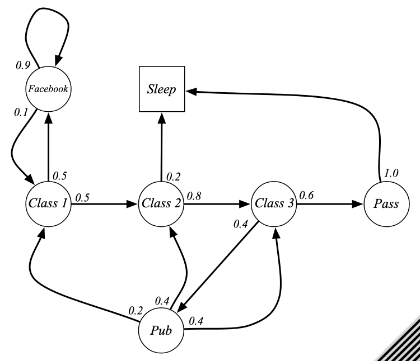

Below is the transition matrix representing the above diagram

| From \ To   | Class1 | Class2 | Class3 | Pass | Pub | Facebook | Sleep |
|-------------|--------|--------|--------|------|-----|----------|-------|
| **Class1**   | 0.0    | 0.5    | 0.0    | 0.0  | 0.0 | 0.5      | 0.0   |
| **Class2**   | 0.0    | 0.0    | 0.8    | 0.0  | 0.0 | 0.0      | 0.2   |
| **Class3**   | 0.0    | 0.0    | 0.0    | 0.6  | 0.4 | 0.0      | 0.0   |
| **Pass**     | 0.0    | 0.0    | 0.0    | 0.0  | 0.0 | 0.0      | 1.0   |
| **Pub**      | 0.2    | 0.4    | 0.4    | 0.0  | 0.0 | 0.0      | 0.0   |
| **Facebook** | 0.1    | 0.0    | 0.0    | 0.0  | 0.0 | 0.9      | 0.0   |
| **Sleep**    | 0.0    | 0.0    | 0.0    | 0.0  | 0.0 | 0.0      | 0.0   |

Additionally:

Each named node in the diagram is a state: $\text{S=\{Class1,Class2,Class3,Pass,Pub,Facebook,Sleep\}}$

From each state, an agent may take one action that leads to probabilistic transitions. In this setup, the actions are implicit and determined by the structure of the graph (arrows)

The reward function assigns a numerical value to transitions. Since no explicit rewards are shown in the diagram, we can assign them based on plausible assumptions i.e., reaching pass +10, going to facebook -1 etc.

### The Bellman Equation

*How do you solve an MDP (Markov Decision Process)?*  
The goal is to **maximise the expected long-term reward**. For example, in a grid world, we aim to reach the square with the highest reward while navigating the environment optimally. To achieve this, we use the **Bellman equation**, which arises from the Bellman-Hamilton-Jacobi principle in dynamic programming.

The **Bellman equation** defines the value of a state under a policy as the expected return (sum of rewards) starting from that state and following the policy thereafter.

Let:  
- $ S $ be the set of states,  
- $ A $ be the set of actions,  
- $ R(s, a) $ be the immediate reward from taking action $ a $ in state $ s $,  
- $ P(s'|s, a) $ be the transition probability to state $ s' $ from state $ s $ after action $ a $,  
- $ \gamma \in [0,1] $ be the **discount factor** (how much we value future rewards),  
- $ V(s) $ be the value of state $ s $.  

Then, the **Bellman optimality equation** is:

$$
V^*(s) = \max_{a \in A} \left[ R(s, a) + \gamma \sum_{s' \in S} P(s'|s, a) V^*(s') \right]
$$

This equation states that the optimal value of a state is the maximum expected return obtainable by choosing the best action at that state.

### Discount Factor

The **discount factor $ \gamma $** determines how much future rewards are worth relative to immediate rewards.  
- If $ \gamma = 0 $, the agent is "short-sighted" and cares only about immediate rewards.  
- If $ \gamma \to 1 $, the agent values future rewards almost as much as immediate ones.

Typically, $ \gamma $ is set between 0.9 and 0.99 in practice to ensure convergence and meaningful long-term planning.

### Value Iteration Algorithm

To solve the Bellman equation and find the optimal policy, we use the **value iteration algorithm**. This is an iterative procedure that updates value estimates until they converge to the optimal values.

The algorithm works as follows:

1. Initialise $ V(s) $ arbitrarily (often to 0) for all $ s \in S $.
2. Repeat until convergence:
   $$
   V_{k+1}(s) = \max_{a \in A} \left[ R(s, a) + \gamma \sum_{s' \in S} P(s'|s, a) V_k(s') \right]
   $$
3. After convergence, derive the optimal policy $ \pi^*(s) $ as:
   $$
   \pi^*(s) = \arg\max_{a \in A} \left[ R(s, a) + \gamma \sum_{s' \in S} P(s'|s, a) V^*(s') \right]
   $$

Value iteration guarantees convergence to the optimal value function $ V^* $ and thus allows derivation of the optimal policy $ \pi^* $.


### Q-Learning

Q-Learning is a model-free reinforcement learning algorithm. It allows an agent to learn the optimal policy that tells you the best decision to make **without** having to learn the transition model or the reward model of the MDP.

Instead of learning the full model of the environment, Q-Learning directly learns the value of taking a given action in a given state, known as the **Q-value** or **action-value function**:

$$
Q(s, a) = \text{expected cumulative reward of taking action } a \text{ in state } s \text{ and following the optimal policy thereafter}
$$

The core update rule is:

$$
Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \max_{a'} Q(s', a') - Q(s, a) \right]
$$

Where:
- $s$ is the current state,
- $a$ is the action taken,
- $r$ is the reward received,
- $s'$ is the next state,
- $\gamma$ is the discount factor (how much future rewards are valued),
- $\alpha$ is the learning rate,
- $\max_{a'} Q(s', a')$ is the estimate of the optimal future value.

This process is repeated as the agent explores the environment, updating its Q-values based on experience.

#### Properties:
- **Off-policy**: Q-Learning learns the value of the optimal policy independently of the agent's actual actions.
- Can converge to the optimal policy even while using an exploration strategy like $\epsilon$-greedy.

#### Simple Algorithm Sketch:
1. Initialise Q(s, a) arbitrarily
2. Observe current state $s$
3. Choose action $a$ using policy derived from Q (e.g., $\epsilon$-greedy)
4. Take action $a$, observe reward $r$ and next state $s'$
5. Update Q(s, a) using the update rule
6. Set $s = s'$ and repeat

Over time, the Q-values converge to the optimal action-value function, allowing the agent to act optimally.



### Temporal Difference (TD) Learning

Temporal Difference (TD) learning is a key concept in reinforcement learning that combines ideas from **Monte Carlo methods** and **dynamic programming**.

It allows an agent to learn directly from raw experience without needing a model of the environment and without waiting until the end of an episode (as in Monte Carlo methods).

#### Key Idea:
TD learning updates value estimates based on **bootstrapping** — i.e., using existing estimates to improve current ones. It learns from **incomplete episodes** by using the difference between successive value estimates.

This difference is known as the **temporal difference error**:

$$
\delta_t = r_{t+1} + \gamma V(s_{t+1}) - V(s_t)
$$

The value update rule is:

$$
V(s_t) \leftarrow V(s_t) + \alpha \, \delta_t = V(s_t) + \alpha \left( r_{t+1} + \gamma V(s_{t+1}) - V(s_t) \right)
$$

Where:
- $V(s_t)$ is the current estimate of the value of state $s_t$,
- $r_{t+1}$ is the reward received after transitioning from $s_t$ to $s_{t+1}$,
- $\gamma$ is the discount factor,
- $\alpha$ is the learning rate.

#### Advantages:
- **Online**: Can learn after every step, not just at the end of an episode.
- **Efficient**: Does not require full knowledge of the environment.
- **Foundational**: Basis for many important RL algorithms (e.g., SARSA, Q-learning, TD(λ)).

#### Variants:
- **SARSA (State-Action-Reward-State-Action)**: On-policy TD control.
- **Q-Learning**: Off-policy TD control.
- **TD(λ)**: Combines TD learning across multiple time steps using eligibility traces.

TD learning is a powerful and general method that forms the backbone of many modern RL techniques.
